In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset= pd.read_csv("train_ctrUa4K.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test= pd.read_csv("test_lAUu6dG.csv")

In [7]:
test_original= test.copy()
train_original= dataset.copy()

In [8]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

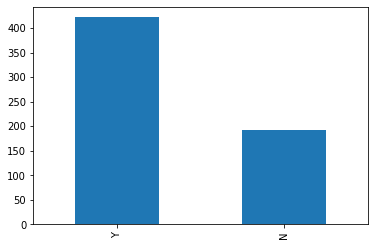

In [10]:
dataset['Loan_Status'].value_counts().plot.bar()

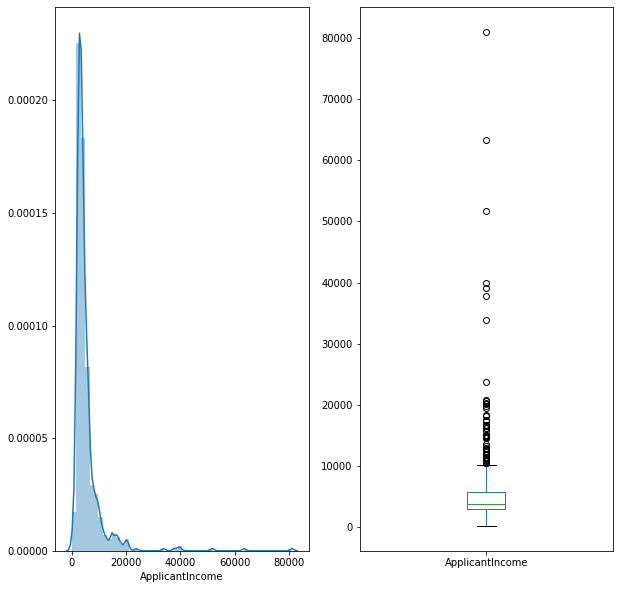

In [11]:
# Now lets look at the applicants income 
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['ApplicantIncome']);
plt.subplot(122)
dataset['ApplicantIncome'].plot.box(figsize=(10,10))
plt.show()

Text(0.5, 0.98, '')

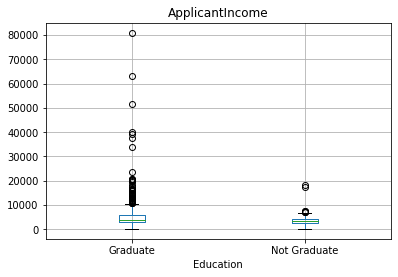

In [12]:
dataset.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

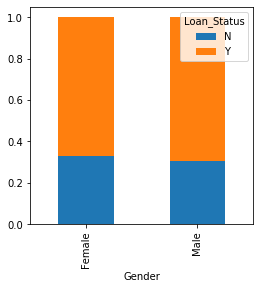

In [13]:
# bivariate analysis. First for categorical data variable:
Gender=pd.crosstab(dataset['Gender'],dataset['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

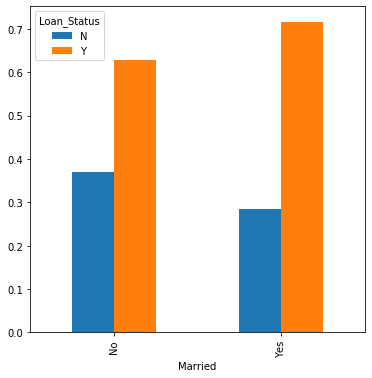

In [14]:
Married = pd.crosstab(dataset['Married'],dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False, figsize=(6,6))

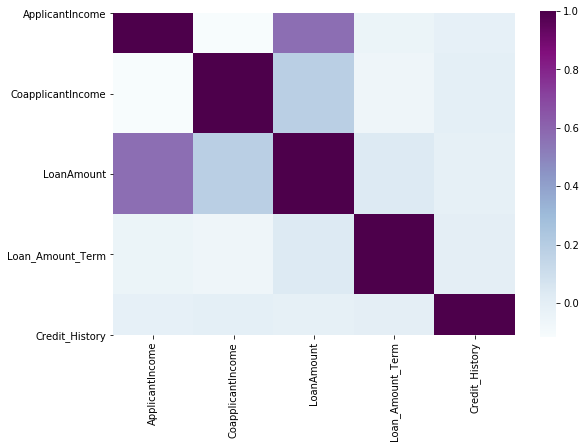

In [15]:
matrix = dataset.corr() 
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu");

In [16]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [18]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [21]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(),inplace=True)

In [22]:
test['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
test['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
test['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
test['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
test['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(dataset['LoanAmount'].median(),inplace=True)

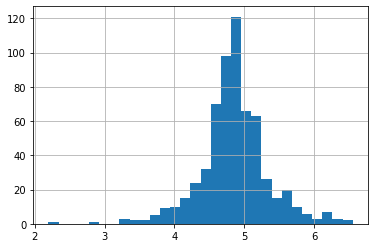

In [23]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=30)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [24]:
dataset=dataset.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [25]:
X = dataset.drop('Loan_Status',1) 
y = dataset.Loan_Status


In [27]:
X=pd.get_dummies(X) 
dataset=pd.get_dummies(dataset) 
test=pd.get_dummies(test)

In [28]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [30]:
regressor = LogisticRegression() 
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred_test = regressor.predict(x_test)

In [32]:
accuracy_score(y_test,pred_test)

0.7987012987012987

In [33]:
pred_test_1=regressor.predict(test)

In [34]:
submission=pd.read_csv("test_lAUu6dG.csv")
submission

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
